### Detección de fraudes con tarjetas de crédito

In [43]:
# Importamos librerias necesarias 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [15]:
# Dataset -- Kaggle -- Credit Card Fraud Detection-2023
path = (r"../Data/creditcard_2023.csv")

data = pd.read_csv(path)

# Punto de reinicio 
df = pd.DataFrame(data)

In [16]:
df.head(4)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [19]:
print(df['Class'].value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


In [26]:
dt = df.copy()

In [28]:
# Eliminar el id
dt = dt.drop(columns=['id'])

In [32]:
# Escalar la columna `Amount`
scaler = StandardScaler()

In [29]:
# Separar características (X) y etiquetas (y)

X = dt.drop(columns=['Class'])  # Características
y = dt['Class']  # Etiquetas (0: no fraude, 1: fraude)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=y)

In [33]:
X_train_standard = scaler.fit_transform(X_train)

In [34]:
print(f'La media de la estandarizacion es: {X_train_standard.mean(axis=0)}\n')
print(f'El estándar de la estandarizacion es: {X_train_standard.std(axis=0)}')

La media de la estandarizacion es: [-1.78509936e-18 -2.14925963e-17  7.14039745e-20 -9.64846206e-18
 -1.43164969e-17 -1.04963843e-17  2.82938249e-18 -7.74733124e-18
 -8.60417893e-18 -2.92756296e-18  1.37809671e-17  2.07785566e-17
  3.49879475e-18 -1.51733446e-18  2.15640003e-17 -1.57088744e-17
  1.38791476e-18 -1.32097353e-18  1.19958677e-17 -3.64160270e-18
  6.64056963e-18 -8.49261022e-18  3.51664575e-18 -1.89399042e-17
  4.67696033e-18 -8.99690079e-18 -1.02464703e-17  1.32632883e-17
 -2.84830454e-16]

El estándar de lo estandarizacion es: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [38]:
# Modelos - Árbol de decisión 
tree_params={'criterion':['gini','entropy','log_loss'],
             'max_depth':[i for i in range(100,401,50)]}

In [41]:
Tree_gridsearch = GridSearchCV(estimator = DecisionTreeClassifier(),
                           param_grid= tree_params,
                           verbose=3)

In [42]:
Tree_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END .....criterion=gini, max_depth=100;, score=0.997 total time=  39.9s
[CV 2/5] END .....criterion=gini, max_depth=100;, score=0.998 total time=  36.6s
[CV 3/5] END .....criterion=gini, max_depth=100;, score=0.997 total time=  40.1s
[CV 4/5] END .....criterion=gini, max_depth=100;, score=0.997 total time=  39.4s
[CV 5/5] END .....criterion=gini, max_depth=100;, score=0.997 total time=  37.4s
[CV 1/5] END .....criterion=gini, max_depth=150;, score=0.997 total time=  38.4s
[CV 2/5] END .....criterion=gini, max_depth=150;, score=0.997 total time=  37.0s
[CV 3/5] END .....criterion=gini, max_depth=150;, score=0.997 total time=  39.6s
[CV 4/5] END .....criterion=gini, max_depth=150;, score=0.997 total time=  44.3s
[CV 5/5] END .....criterion=gini, max_depth=150;, score=0.997 total time=  41.0s
[CV 1/5] END .....criterion=gini, max_depth=200;, score=0.997 total time=  42.5s
[CV 2/5] END .....criterion=gini, max_depth=200

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [100, 150, 200, 250, 300, 350, 400]},
             verbose=3)

In [47]:
# Obtener los mejores hiperparámetros
best_params = Tree_gridsearch.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 200}


In [48]:
# Usar el mejor modelo para hacer predicciones
best_tree_model = Tree_gridsearch.best_estimator_
y_pred = best_tree_model.predict(X_test)
y_pred_proba = best_tree_model.predict_proba(X_test)[:, 1]

print(y_pred_proba)

[1. 0. 0. ... 1. 0. 0.]


In [49]:
# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo (Accuracy):", accuracy)

Precisión del modelo (Accuracy): 0.9980596638704723


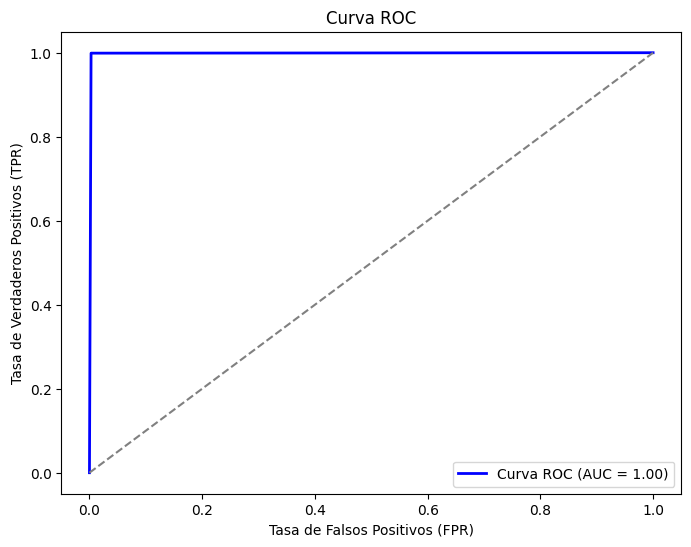

In [50]:
# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

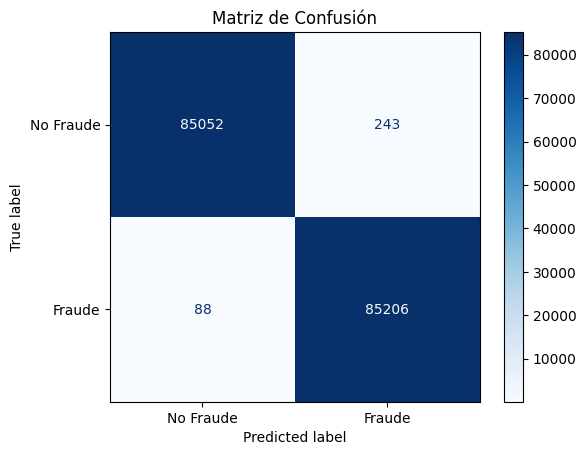

In [51]:
# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraude', 'Fraude'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

##### Red Neuronal Artificial

In [52]:
# Libreria necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [53]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [54]:
# Crear la arquitectura de la ANN
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),  # Capa oculta 1
    Dropout(0.5),                               # Regularización para evitar overfitting
    Dense(32, activation='relu'),               # Capa oculta 2
    Dropout(0.5),                               # Regularización
    Dense(1, activation='sigmoid')              # Capa de salida (clasificación binaria)
])

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# Compilar el modelo
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [56]:
# Entrenar la ANN
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),  # Validación durante el entrenamiento
                    epochs=20,                                # Número de épocas
                    batch_size=32,                            # Tamaño del lote
                    verbose=1)

Epoch 1/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9559 - loss: 0.1193 - val_accuracy: 0.9938 - val_loss: 0.0225
Epoch 2/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9891 - loss: 0.0334 - val_accuracy: 0.9969 - val_loss: 0.0146
Epoch 3/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9918 - loss: 0.0264 - val_accuracy: 0.9970 - val_loss: 0.0128
Epoch 4/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9926 - loss: 0.0248 - val_accuracy: 0.9975 - val_loss: 0.0121
Epoch 5/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9936 - loss: 0.0221 - val_accuracy: 0.9983 - val_loss: 0.0094
Epoch 6/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9939 - loss: 0.0215 - val_accuracy: 0.9981 - val_loss: 0.0096
Epoch 7/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - accuracy: 0.9942 - loss: 0.0206 - val_accuracy: 0.9982 - val_loss: 0.0091
Epoch 8/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 

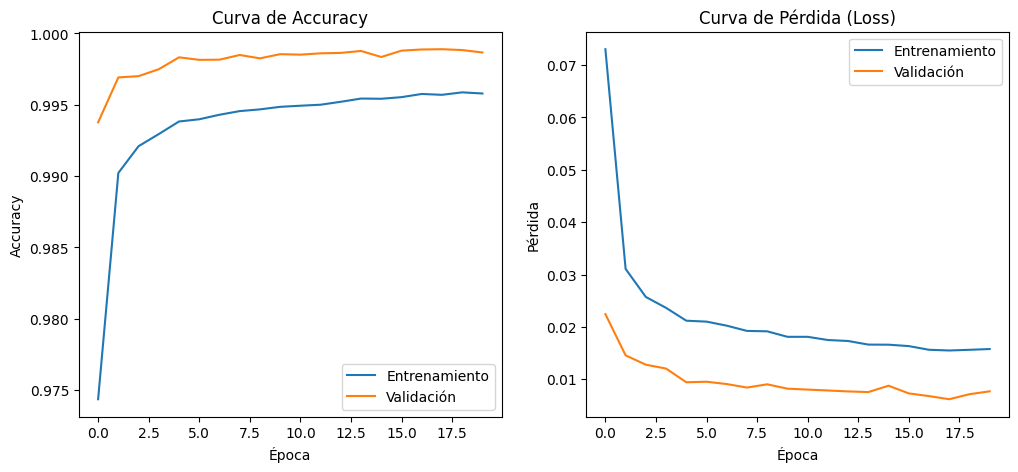

In [57]:
# Graficar las curvas de accuracy y pérdida
plt.figure(figsize=(12, 5))

# Gráfica de accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [58]:
# Evaluar la ANN en el conjunto de prueba
y_pred_ann = (model.predict(X_test_scaled) > 0.5).astype(int)  # Predicciones binarias

ann_accuracy = accuracy_score(y_test, y_pred_ann)
print("Precisión de la ANN (Accuracy):", ann_accuracy)

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
Precisión de la ANN (Accuracy): 0.998663454267274


In [59]:
# Comparar con el Árbol de Decisión
print("Precisión del Árbol de Decisión:", accuracy_score(y_test, y_pred))
print("Precisión de la ANN:", ann_accuracy)

Precisión del Árbol de Decisión: 0.9980596638704723
Precisión de la ANN: 0.998663454267274


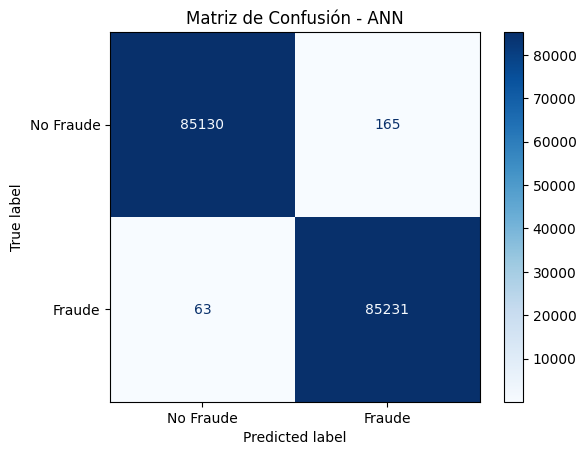

In [60]:
# Matriz de Confusión para la ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=['No Fraude', 'Fraude'])
disp_ann.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - ANN')
plt.show()

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


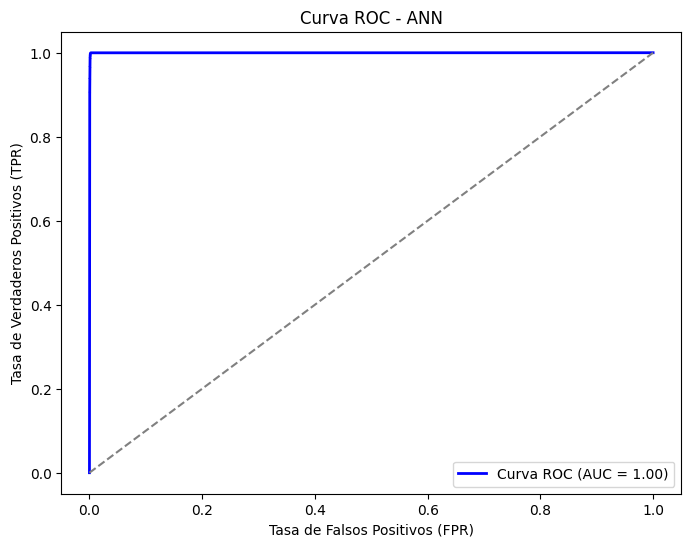

In [61]:
# Curva ROC para la ANN
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, model.predict(X_test_scaled))
roc_auc_ann = roc_auc_score(y_test, model.predict(X_test_scaled))

plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - ANN')
plt.legend(loc='lower right')
plt.show()